Arun Saha

12991493

DSCI100-009 Group 13

GitHub Repo: https://github.com/ArunSaha206/dsci100-project/tree/main

In [1]:
library(tidyverse)
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

***Data Description***

**players.csv**

Number of Observations: 196

Number of Variables: 7

*Variable Descriptions*

| Name | Type | Description |
|----------|---------------|-------------|
| experience | chr | One of: Beginner, Amateur, Regular, Veteran, Pro used to describe familiarity with Minecraft|
| subscribe | lgl | TRUE or FALSE representing if a subscription was purchased |
| hashedEmail | chr | Encrypted user-specific email, but still distinguishable |
| played_hours | dbl | Total number of hours played during testing |
| name | chr | First name of user |
| gender | chr | Gender of user |
| Age | dbl | Age of user (years) |


Issues & Potential Issues Within Data:
1. There may be multiple people with the same name, which may run into issues: ideally, users are distinguished by hashedEmail
2. The way experience is measured as a class can be ambiguous, as there is no set-in-stone definition for what classifies one as an "Amateur" vs a "Pro"

Data Collection Methods: Recording user data from those who play on the Minecraft server (PLAICraft)

**sessions.csv**

Number of Observations: 1535

Number of Variables: 5

*Variable Descriptions*

| Name | Type | Description |
|----------|---------------|-------------|
| hashedEmail | chr | Encrypted user-specific email, but still distinguishable |
| start_time | chr | Start of play session in dd/mm/yyyy hh:mm format |
| end_time | chr | End of play session in dd/mm/yyyy hh:mm format |
| original_start_time | dbl | Start of play session in unix epoch time in milliseconds (milleseconds since Jan 1st 1970 00:00:00 UTC) |
| original_end_time | dbl | End of play session in unix epoch time in milliseconds (milleseconds since Jan 1st 1970 00:00:00 UTC) |

Issues & Potential Issues Within Data:
1. start_time and end_time include both the date as well as the time, and may need to be split somehow into two different variables, consisting of just the date and just the time
2. original_start_time and original_end_time may need to be converted into more human ways of measuring time
3. original_start_time and original_end_time do not have sufficient decimal places to be able to calculate the exact session time of a user


Data Collection Methods: Recording user data from those who play on the Minecraft server (PLAICraft)

***Questions***

**Broad Question**

What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Formulated Question**

Can user-average play session length predict subscription status in the Minecraft server data?

***Exploratory Data Analysis and Visualization***

| Variable Name | Mean | 
|---------------|------|
| played_hours | 5.845918 |
| age | 21.13918 |
| original_start_time | 1.719201e+12 |
| original_end_time | 1.719196e+12 |

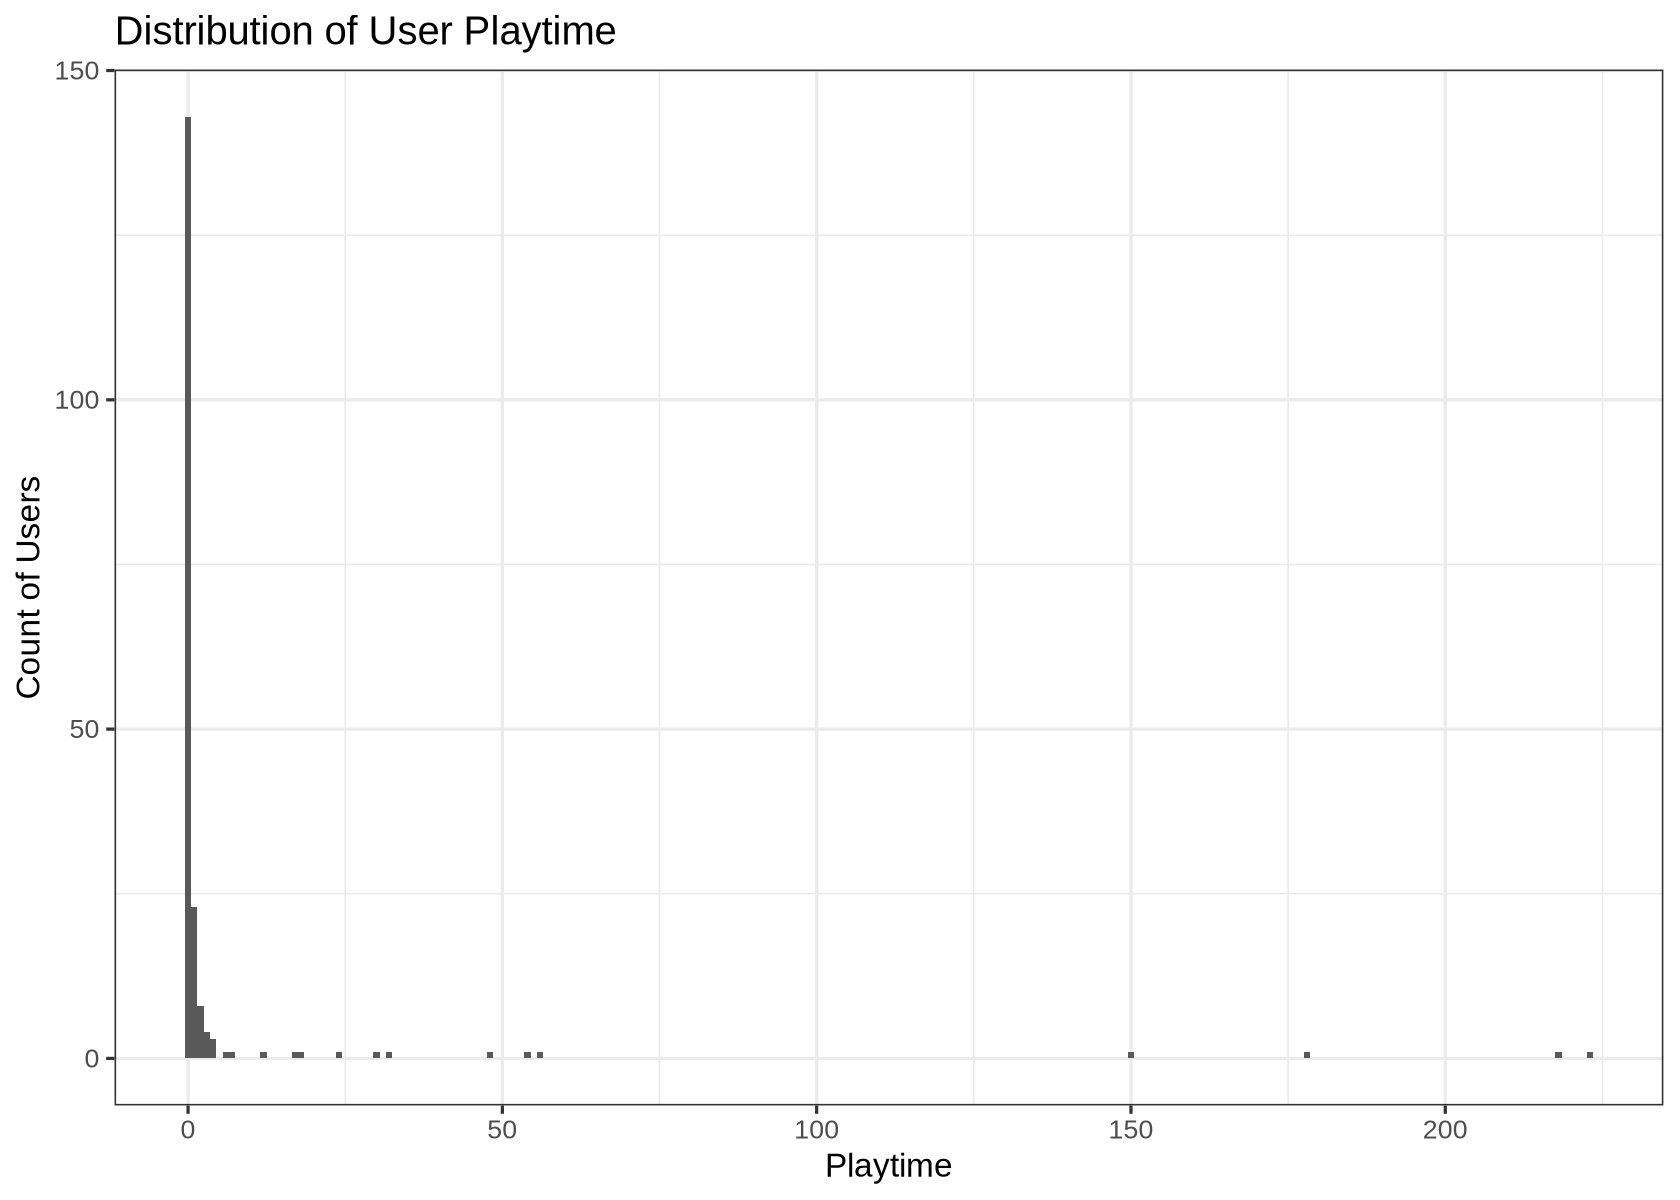

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


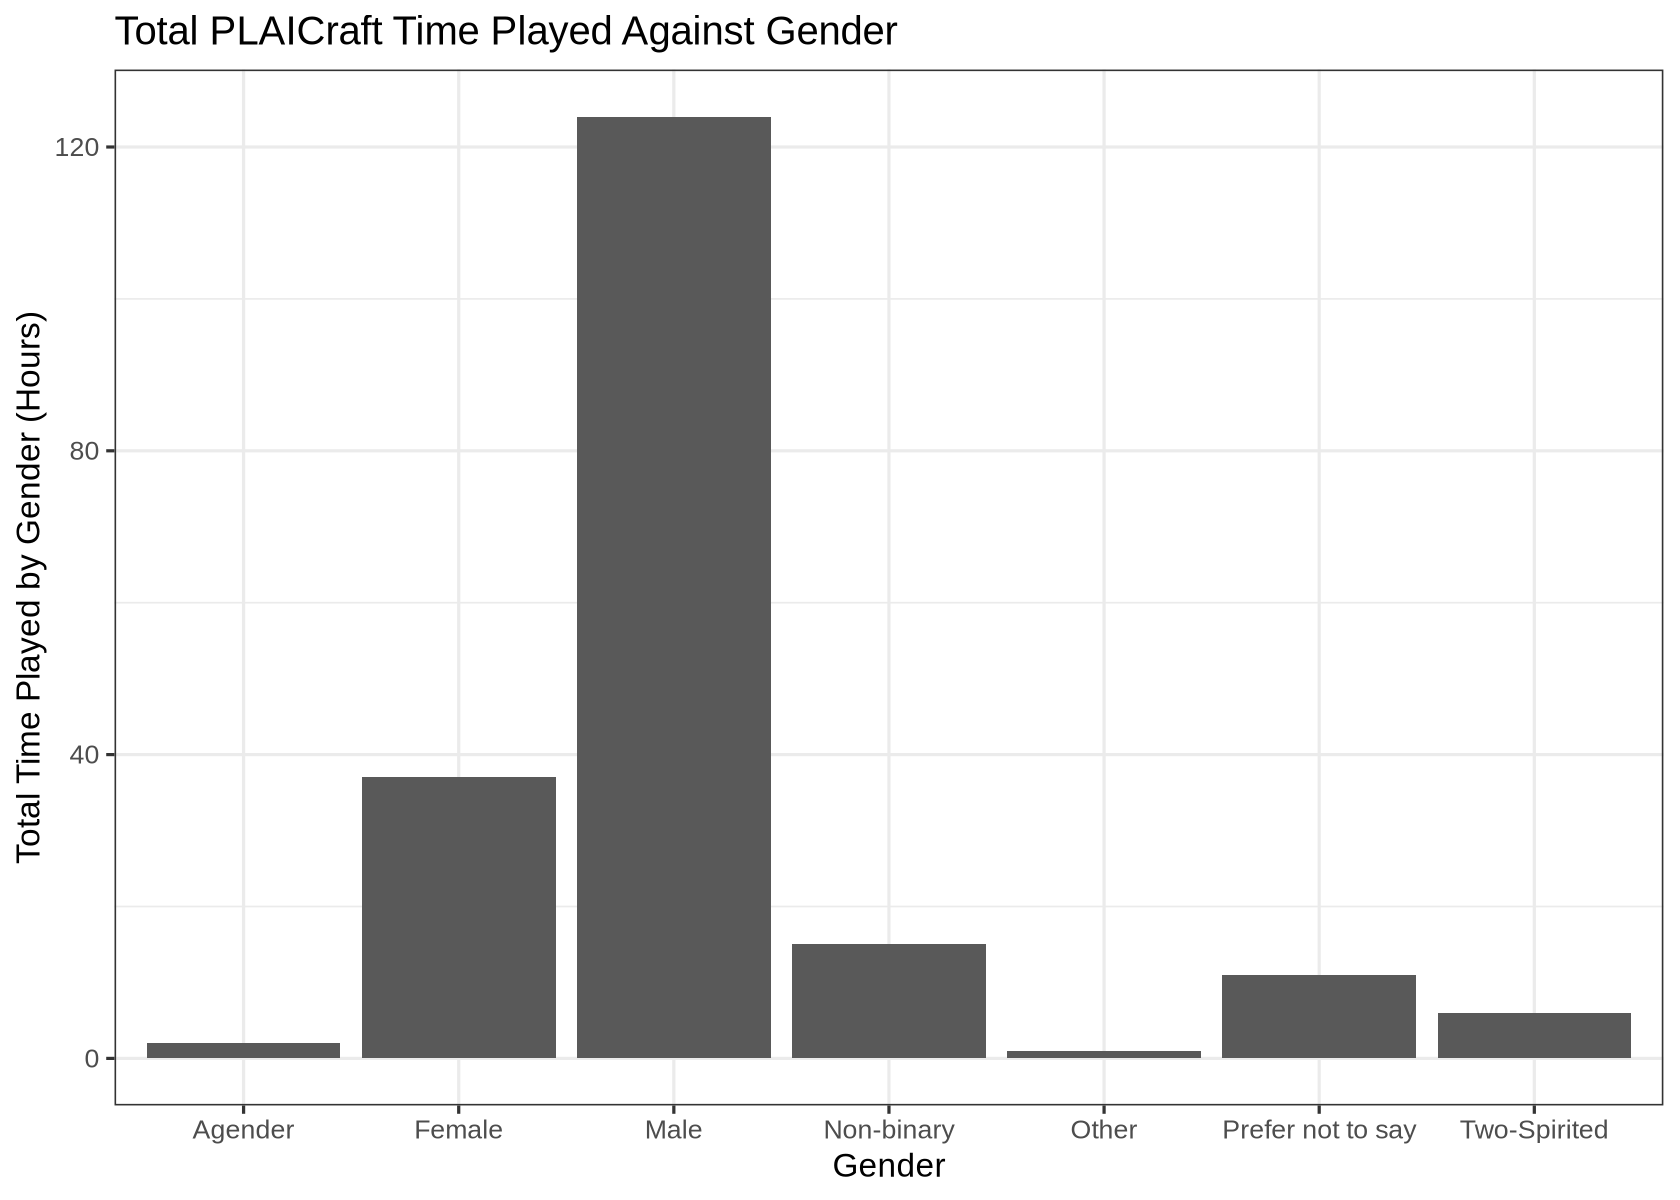

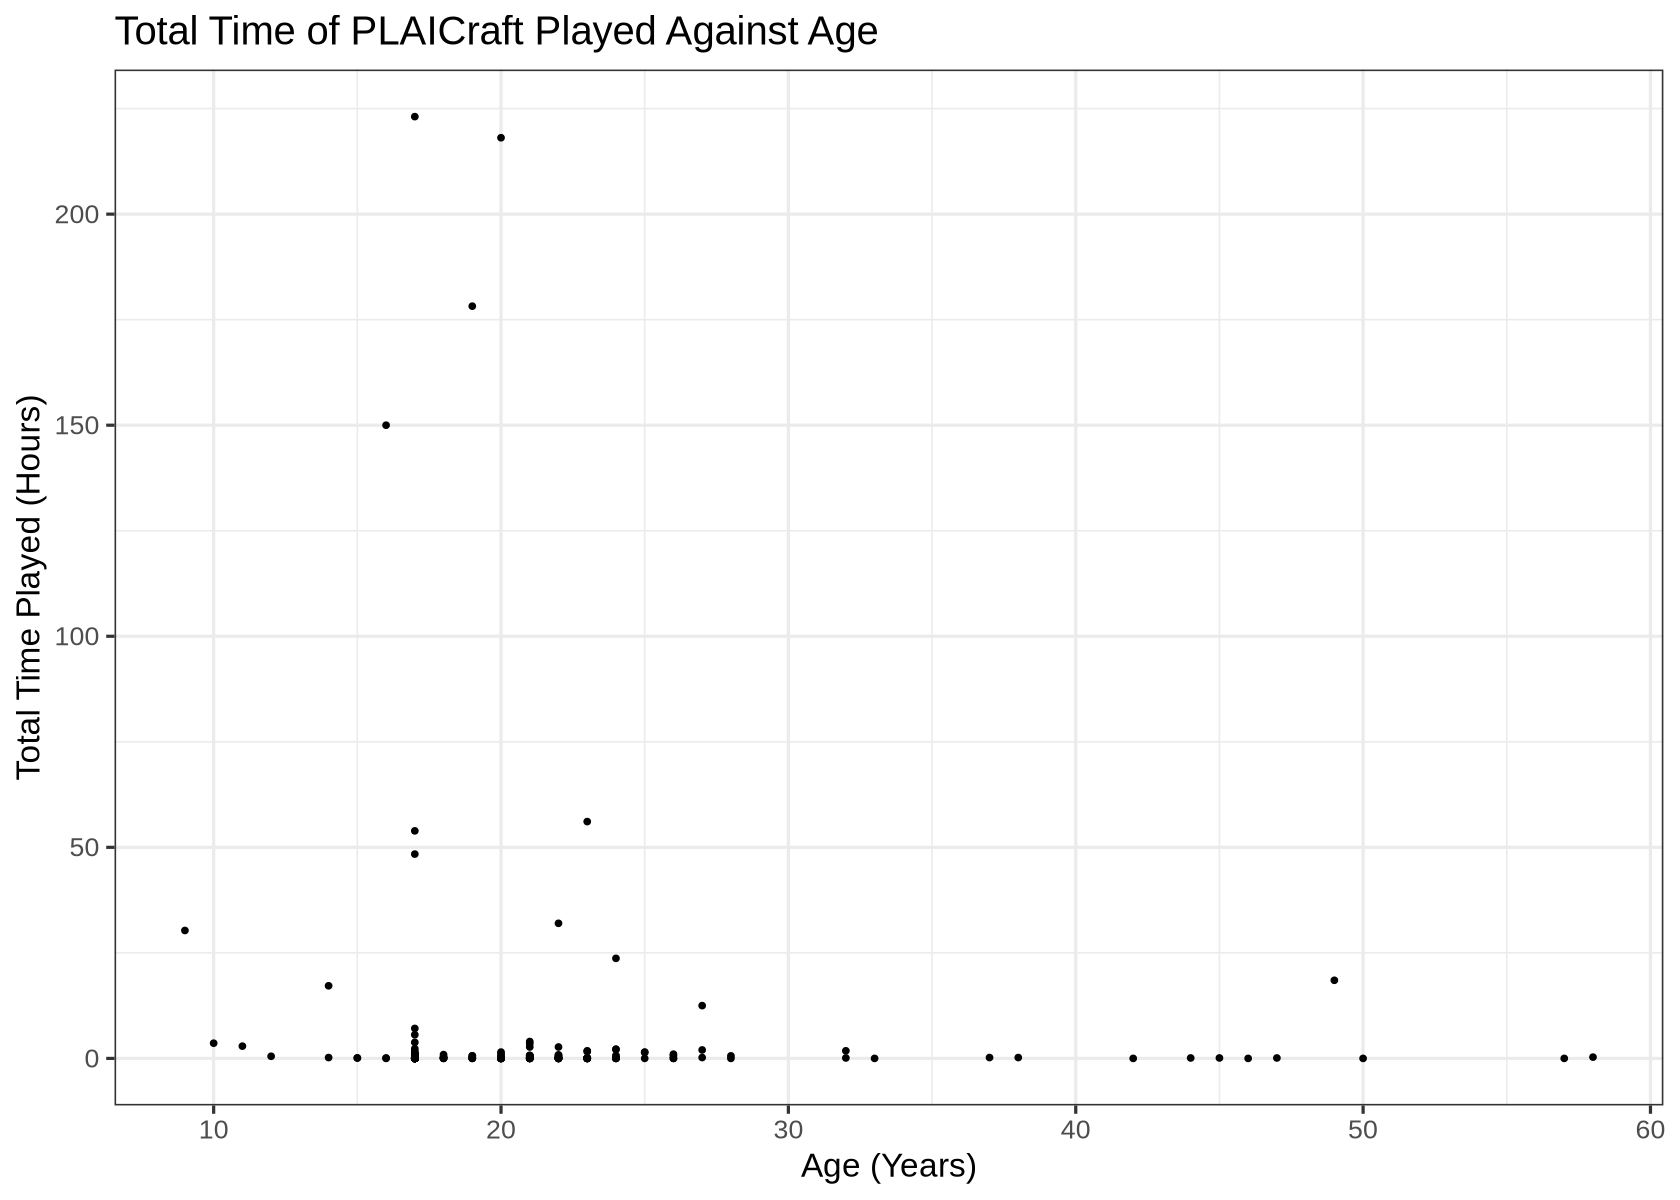

In [2]:
options(repr.plot.width = 14, repr.plot.height = 10)

age_vs_hours_plot <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
           geom_point() +
           labs(x = "Age (Years)", y = "Total Time Played (Hours)") +
           ggtitle("Total Time of PLAICraft Played Against Age") +
           theme_bw(base_size = 20)

hours_by_gender_plot <- players |>
    ggplot(aes(x = gender)) +
        geom_bar(position = "stack") +
        labs(x = "Gender", y = "Total Time Played by Gender (Hours)") +
        ggtitle("Total PLAICraft Time Played Against Gender") +
        theme_bw(base_size = 20)

playtime_distribution <- players |>
    ggplot(aes(x = played_hours)) +
        geom_histogram(binwidth = 1) +
        labs(x = "Playtime", y = "Count of Users") +
        ggtitle("Distribution of User Playtime") +
        theme_bw(base_size = 20)

playtime_distribution
hours_by_gender_plot
age_vs_hours_plot

***Exploratory Data Visualization Takeaways***

1. The vast majority of users played on PLAICraft Minecraft server for less than 1 hour.
2. The mean playtime of 5.8 hours with the first takeaway in mind suggests that outliers who played for multiple hours brought up the mean playtime, and perhaps a median playtime would be more fitting for understanding general patterns on PLAICraft
3. The gender that played the most playcraft overall (not necessarily on average) was males
4. There appears to be a pattern where those with higher playing times tend to be younger in age

***Methods and Plan***

I propose to use kknn nearest neighbors because I am currently unsure if there will be a relationship between average session play time and if the user subscribes to the newsletter, and if there is, it is not gaurenteed that the relationship will be strictly linear. For this reason, and because this is a classification problem, I believe that using K-nearest neighbors will be the most fitting method to address whether average user-session play time can predict newsletter subscription status.

To apply the method selected, it is important to assume (in this case, I will perform) that the data is scaled and centered, as this is key to using K nearest neighbors classification.

The potential limitation of the method selected is that if there is any relationship, the model may be useless as the datapoints will be all overfitted, and the heatmap that creates the predicted classes will not be a large area, rather perhaps spots of interchanging TRUE/FALSE classifications of subscription status.

Given that there is a relationship and there are clear bounds in which a user's average session play time correlates to a specific subscription status, I will compare and select the model by tuning the nearest neighbors from values of 0 all the way to the number of data points to find the neighbor value that results in the highest precision and accuracy rates.

I will split the data into training and testing datasets at a prop of 0.6 and 0.4, respectively, and I will perform a 5-fold cross-validation set. This will be to ensure the accuracies and precision readings are prevented from having an anomalous dataset, thereby influencing their values and potentially leading me to pick a subpar neighbor value for the final model.

In [3]:
players_mean <- players |>
    select(played_hours, Age) |>
    summarize(avg_played_hours = mean(played_hours, na.rm = TRUE),
              avg_age = mean(Age, na.rm = TRUE))

session_mean <- sessions |>
    select(original_start_time, original_end_time) |>
    summarize(avg_og_start = mean(original_start_time, na.rm = TRUE),
              avg_og_end = mean(original_end_time, na.rm = TRUE))

In [4]:
players_tidy <- players
sessions_tidy <- sessions |> 
    select(hashedEmail, start_time, end_time)